**Flight Fares Estimation**



![flight gif url](https://media.giphy.com/media/3o6nV8OYdUhiuKja1i/giphy.gif)



Understanding the flight fares estimation(Business Understanding)





*To estimate the flight fares there will be several factors which will include like  Date of journey, Duration, Total stops, Additional info 

**Features and column info**






variable|variable info
-----------|--------------------
Airline|Type of Airline
Date of journey|reprsents the journey date
Source|journey starts from
Destination|journey ends to
Route|from which place to which place
Dep Time|time of departure
Arrival time|time of arrival
Duration|total journey duration
Total stops|how many stops in entire duration of journey
Additional info|any extra information during the journey
Price|total fare for entire journey

**DATA**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image

In [2]:
rawdata=pd.read_excel('C:\\Users\\sarat\\Downloads\\Data_Train.xlsx')

In [3]:
pwd

'C:\\Users\\sarat\\Downloads'

In [4]:
rawdata.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [5]:
rawdata.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [6]:
rawdata.shape

(10683, 11)

In [7]:
rawdata.isnull().sum() 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
rawdata=rawdata.dropna()

**Data Cleaning**

In [9]:
rawdata.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
rawdata['Airline'].apply(str.lower)

0             indigo
1          air india
2        jet airways
3             indigo
4             indigo
            ...     
10678       air asia
10679      air india
10680    jet airways
10681        vistara
10682      air india
Name: Airline, Length: 10682, dtype: object

In [11]:
rawdata['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [12]:
rawdata['Date_of_Journey']=rawdata['Date_of_Journey'].str.replace('/','-')

In [13]:
rawdata['Date_of_Journey'][20:50]

20     6-03-2019
21    21-03-2019
22     3-04-2019
23     1-05-2019
24     6-05-2019
25     9-06-2019
26     1-06-2019
27    15-05-2019
28    18-06-2019
29    15-06-2019
30    18-06-2019
31     1-05-2019
32     6-04-2019
33    15-06-2019
34    18-05-2019
35    27-06-2019
36    21-05-2019
37    18-05-2019
38    06-03-2019
39     3-06-2019
40    21-05-2019
41    15-03-2019
42    18-05-2019
43     6-05-2019
44    21-03-2019
45    24-03-2019
46    27-05-2019
47     3-05-2019
48    15-05-2019
49    27-06-2019
Name: Date_of_Journey, dtype: object

extracting day,month,weekday

In [14]:
rawdata['Journey_Day'] = pd.to_datetime(rawdata.Date_of_Journey, format='%d-%m-%Y').dt.day
rawdata['Journey_Month'] = pd.to_datetime(rawdata.Date_of_Journey, format='%d-%m-%Y').dt.month
rawdata['weekday']= pd.to_datetime(rawdata.Date_of_Journey, format='%d-%m-%Y').dt.weekday

In [15]:
rawdata=rawdata.drop(['Date_of_Journey'],axis=1)

In [16]:
rawdata.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4


In [17]:
rawdata['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

Dropping the route column because iam going to considering source & destination

In [18]:
rawdata=rawdata.drop(['Route'], axis=1)

In [19]:
rawdata['Duration'][0:30]


0      2h 50m
1      7h 25m
2         19h
3      5h 25m
4      4h 45m
5      2h 25m
6     15h 30m
7      21h 5m
8     25h 30m
9      7h 50m
10    13h 15m
11     2h 35m
12     2h 15m
13    12h 10m
14     2h 35m
15    26h 35m
16     4h 30m
17    22h 35m
18        23h
19    20h 35m
20     5h 10m
21    15h 20m
22     2h 50m
23     2h 55m
24    13h 20m
25    15h 10m
26     5h 45m
27     5h 55m
28     2h 50m
29     2h 15m
Name: Duration, dtype: object

In [20]:
def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
rawdata['Duration']=rawdata['Duration'].apply(duration)
rawdata['Duration']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10682, dtype: object

In [21]:
rawdata['Duration']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10682, dtype: object


Extracting whether its a morning,evening,night or afternoon flight from departure time & arrival time 


5 am to 11 am(morning)

11 am to 5pm(afternoon)

5pm to 9pm(evening)

9pm to 5am(night)

In [22]:

def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
rawdata['Dep_Time']=rawdata['Dep_Time'].apply(deparrtime)
rawdata['Arrival_Time']=rawdata['Arrival_Time'].apply(deparrtime)

In [23]:
rawdata.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,non-stop,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2 stops,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,Morning,Night,1140,2 stops,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,Evening,Night,325,1 stop,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,Evening,Night,285,1 stop,No info,13302,1,3,4


In [24]:
rawdata['Total_Stops'][0:30]

0     non-stop
1      2 stops
2      2 stops
3       1 stop
4       1 stop
5     non-stop
6       1 stop
7       1 stop
8       1 stop
9       1 stop
10      1 stop
11    non-stop
12    non-stop
13      1 stop
14    non-stop
15     2 stops
16      1 stop
17      1 stop
18     2 stops
19      1 stop
20      1 stop
21      1 stop
22    non-stop
23    non-stop
24      1 stop
25     2 stops
26      1 stop
27      1 stop
28    non-stop
29    non-stop
Name: Total_Stops, dtype: object

converting total stops into 0,1,2----

In [25]:
def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        x.strip()
        stps=x.split(' ')[0]
        x=stps
    return x
rawdata['Total_Stops']=rawdata['Total_Stops'].apply(stops)
rawdata['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: object

In [26]:
pd.options.mode.chained_assignment = None 
for i in range(rawdata.shape[0]):
    if(rawdata.iloc[i]['Additional_Info']=='No info'):
        rawdata.iloc[i]['Additional_Info']='No Info' 
        

In [27]:
rawdata['Additional_Info'][0:40]

0                         No info
1                         No info
2                         No info
3                         No info
4                         No info
5                         No info
6     In-flight meal not included
7                         No info
8     In-flight meal not included
9                         No info
10                        No info
11                        No info
12                        No info
13    In-flight meal not included
14                        No info
15                        No info
16                        No info
17    In-flight meal not included
18                        No info
19    In-flight meal not included
20                        No info
21                        No info
22                        No info
23                        No info
24    In-flight meal not included
25                        No info
26                        No info
27                        No info
28                        No info
29            

In [28]:
rawdata['Price']

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [29]:
rawdata.head(10)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,Morning,Night,1140,2,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,Evening,Night,325,1,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,Evening,Night,285,1,No info,13302,1,3,4
5,SpiceJet,Kolkata,Banglore,Morning,Afternoon,145,0,No info,3873,24,6,0
6,Jet Airways,Banglore,New Delhi,Evening,Morning,930,1,In-flight meal not included,11087,12,3,1
7,Jet Airways,Banglore,New Delhi,Morning,Morning,1265,1,No info,22270,1,3,4
8,Jet Airways,Banglore,New Delhi,Morning,Morning,1530,1,In-flight meal not included,11087,12,3,1
9,Multiple carriers,Delhi,Cochin,Afternoon,Evening,470,1,No info,8625,27,5,0


In [30]:
rawdata[rawdata.duplicated()]

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
683,Jet Airways,Delhi,Cochin,Afternoon,Night,830,2,No info,13376,1,6,5
1061,Air India,Delhi,Cochin,Night,Evening,1275,2,No info,10231,21,5,1
1348,Air India,Delhi,Cochin,Evening,Evening,1560,2,No info,12392,18,5,5
1418,Jet Airways,Delhi,Cochin,Morning,Night,1375,2,In-flight meal not included,10368,6,6,3
1674,IndiGo,Banglore,New Delhi,Evening,Night,175,0,No info,7303,24,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
10634,Jet Airways,Delhi,Cochin,Morning,Afternoon,1615,2,In-flight meal not included,11733,6,6,3
10664,IndiGo,Banglore,Delhi,Evening,Night,175,0,No info,4823,9,4,1
10665,IndiGo,Kolkata,Banglore,Afternoon,Evening,150,0,No info,4804,27,4,5
10672,Jet Airways,Delhi,Cochin,Night,Evening,1195,2,In-flight meal not included,11150,27,6,3


In [31]:
rawdata=rawdata.drop_duplicates().reset_index(drop=True)

In [32]:
rawdata.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,Morning,Night,1140,2,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,Evening,Night,325,1,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,Evening,Night,285,1,No info,13302,1,3,4


In [33]:
cleaned_data=rawdata[['Airline','Source','Destination','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info','Price','Journey_Day','Journey_Month','weekday']]

In [34]:
cleaned_data=cleaned_data.reset_index(drop=True)

In [35]:
cleaned_data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,Morning,Night,1140,2,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,Evening,Night,325,1,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,Evening,Night,285,1,No info,13302,1,3,4


In [36]:
rawdata["Duration"] = rawdata["Duration"].astype(int)
rawdata["Journey_Day"] = rawdata["Journey_Day"].astype(object)
rawdata["Journey_Month"] = rawdata["Journey_Month"].astype(object)
rawdata["weekday"] =rawdata["weekday"].astype(object)

In [37]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10372 entries, 0 to 10371
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10372 non-null  object
 1   Source           10372 non-null  object
 2   Destination      10372 non-null  object
 3   Dep_Time         10372 non-null  object
 4   Arrival_Time     10372 non-null  object
 5   Duration         10372 non-null  int32 
 6   Total_Stops      10372 non-null  object
 7   Additional_Info  10372 non-null  object
 8   Price            10372 non-null  int64 
 9   Journey_Day      10372 non-null  object
 10  Journey_Month    10372 non-null  object
 11  weekday          10372 non-null  object
dtypes: int32(1), int64(1), object(10)
memory usage: 932.0+ KB


journey month is in object but in column it is in numbers,so replacing numbers into month names by doing copy()

In [38]:
df1=rawdata.copy()

In [39]:
df1["Journey_Month"]=df1["Journey_Month"].replace({3:"March",4:"April",5:"May",6:"June"})
df1["Journey_Month"]=df1["Journey_Month"].astype(object)


In [40]:
rawdata['Journey_Day']=rawdata['Journey_Day'].astype(int)
rawdata['Total_Stops']=rawdata['Total_Stops'].astype(int)
rawdata['weekday']=rawdata['weekday'].astype(int)                               

In [41]:
rawdata.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,Morning,Night,1140,2,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,Evening,Night,325,1,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,Evening,Night,285,1,No info,13302,1,3,4


In [42]:
df1.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,3897,24,March,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,7662,1,May,2
2,Jet Airways,Delhi,Cochin,Morning,Night,1140,2,No info,13882,9,June,6
3,IndiGo,Kolkata,Banglore,Evening,Night,325,1,No info,6218,12,May,6
4,IndiGo,Banglore,New Delhi,Evening,Night,285,1,No info,13302,1,March,4


In [43]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10372 entries, 0 to 10371
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10372 non-null  object
 1   Source           10372 non-null  object
 2   Destination      10372 non-null  object
 3   Dep_Time         10372 non-null  object
 4   Arrival_Time     10372 non-null  object
 5   Duration         10372 non-null  int32 
 6   Total_Stops      10372 non-null  int32 
 7   Additional_Info  10372 non-null  object
 8   Price            10372 non-null  int64 
 9   Journey_Day      10372 non-null  int32 
 10  Journey_Month    10372 non-null  object
 11  weekday          10372 non-null  int32 
dtypes: int32(4), int64(1), object(7)
memory usage: 810.4+ KB


In [44]:
df1["Journey_Month"].unique()

array(['March', 'May', 'June', 'April'], dtype=object)

In [45]:
#rawdata["Journey_Month"]=rawdata["Journey_Month"].replace({3:"March",4:"April",5:"May",6:"June"})
#rawdata["Journey_Month"]=rawdata["Journey_Month"].astype(object)

 #only 3,4,5,6 months are there in data                                                  
rawdata

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,Morning,Night,1140,2,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,Evening,Night,325,1,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,Evening,Night,285,1,No info,13302,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10367,Air Asia,Kolkata,Banglore,Evening,Night,150,0,No info,4107,9,4,1
10368,Air India,Kolkata,Banglore,Evening,Night,155,0,No info,4145,27,4,5
10369,Jet Airways,Banglore,Delhi,Morning,Afternoon,180,0,No info,7229,27,4,5
10370,Vistara,Banglore,New Delhi,Afternoon,Afternoon,160,0,No info,12648,1,3,4


In [46]:
rawdata.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,Morning,Night,1140,2,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,Evening,Night,325,1,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,Evening,Night,285,1,No info,13302,1,3,4


In [47]:
rawdata.info()
rawdata.head()
rawdata['Journey_Month'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10372 entries, 0 to 10371
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10372 non-null  object
 1   Source           10372 non-null  object
 2   Destination      10372 non-null  object
 3   Dep_Time         10372 non-null  object
 4   Arrival_Time     10372 non-null  object
 5   Duration         10372 non-null  int32 
 6   Total_Stops      10372 non-null  int32 
 7   Additional_Info  10372 non-null  object
 8   Price            10372 non-null  int64 
 9   Journey_Day      10372 non-null  int32 
 10  Journey_Month    10372 non-null  object
 11  weekday          10372 non-null  int32 
dtypes: int32(4), int64(1), object(7)
memory usage: 810.4+ KB


array([3, 5, 6, 4], dtype=object)

In [48]:
cleaned_data.to_csv(' Train Flight Fares Cleaned Data.csv',index=False)
rawdata.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,Morning,Night,1140,2,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,Evening,Night,325,1,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,Evening,Night,285,1,No info,13302,1,3,4


**Test dada**

In [49]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt

import  seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [50]:
test=pd.read_excel('C:\\Users\\sarat\\OneDrive\\Desktop\\Test_set.xlsx')

In [51]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


Date of journey

In [52]:
test['Date_of_Journey'][0:20]

0      6/06/2019
1     12/05/2019
2     21/05/2019
3     21/05/2019
4     24/06/2019
5     12/06/2019
6     12/03/2019
7      1/05/2019
8     15/03/2019
9     18/05/2019
10    21/03/2019
11    15/06/2019
12    15/05/2019
13    12/03/2019
14     3/06/2019
15    06/03/2019
16     6/06/2019
17    24/03/2019
18    12/06/2019
19    12/03/2019
Name: Date_of_Journey, dtype: object

extracting date of journey to journey day, journey month, week day

In [53]:
test['Journey_Day']=pd.to_datetime(test.Date_of_Journey, format='%d/%m/%Y').dt.day
test['Journey_Month']=pd.to_datetime(test.Date_of_Journey, format='%d/%m/%Y').dt.month
test['weekday']=pd.to_datetime(test.Date_of_Journey,format='%d/%m/%Y').dt.weekday

In [54]:
test.drop(['Date_of_Journey'],axis=1,inplace=True)

In [55]:
test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,3
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,6
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,1
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,1
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,0


Dropping the Route column because iam going to consider source & destination

In [56]:
#test.drop(['Route'],axis=1,inplace=True)
test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,3
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,6
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,1
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,1
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,0


Dep time, Arrival time are converting into morning,evening,night and afternoon

In [57]:

def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
test['Dep_Time']=test['Dep_Time'].apply(deparrtime)
test['Arrival_Time']=test['Arrival_Time'].apply(deparrtime)

In [58]:
test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,Evening,Night,10h 55m,1 stop,No info,6,6,3
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,Morning,Morning,4h,1 stop,No info,12,5,6
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,Evening,Evening,23h 45m,1 stop,In-flight meal not included,21,5,1
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,Morning,Night,13h,1 stop,No info,21,5,1
4,Air Asia,Banglore,Delhi,BLR → DEL,Night,Night,2h 50m,non-stop,No info,24,6,0


converting duration hours into minutes

In [59]:
def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
test['Duration']=test['Duration'].apply(duration)
test['Duration']

0        655
1        240
2       1425
3        780
4        170
        ... 
2666    1435
2667     155
2668     395
2669     915
2670     860
Name: Duration, Length: 2671, dtype: object

Total stops

In [60]:
def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        x.strip()
        stps=x.split(' ')[0]
        x=stps
    return x
test['Total_Stops']=test['Total_Stops'].apply(stops)
test['Total_Stops']

0       1
1       1
2       1
3       1
4       0
       ..
2666    1
2667    0
2668    1
2669    1
2670    1
Name: Total_Stops, Length: 2671, dtype: object

In [61]:

test=test.drop(['Route'],axis=1)

In [62]:
test['Journey_Day']=test['Journey_Day'].astype(int)
test['Total_Stops']=test['Total_Stops'].astype(int)
test['weekday']=test['weekday'].astype(int)

In [63]:
cleaned_data.to_csv(' Test Flight Fares Cleaned Data.csv',index=False)
test.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,Jet Airways,Delhi,Cochin,Evening,Night,655,1,No info,6,6,3
1,IndiGo,Kolkata,Banglore,Morning,Morning,240,1,No info,12,5,6
2,Jet Airways,Delhi,Cochin,Evening,Evening,1425,1,In-flight meal not included,21,5,1
3,Multiple carriers,Delhi,Cochin,Morning,Night,780,1,No info,21,5,1
4,Air Asia,Banglore,Delhi,Night,Night,170,0,No info,24,6,0


In [64]:
#cleaned_data.to_csv('flight fares cleaned data original.csv',index=False)

**EDA**(insights)


EDA, Visualizations: Qualitative and Quantitative analysis

### Data Analysis can be done after Data validation and cleaning

* This can be either,

    - **Getting Insights (study of present column/s data) - Descriptive Analysis**
    - **Getting Predictions (predictions of future values of a column data w.r.t other columns) - Predictive analysis**

EDA is divided into three types of analysis


Uni-Variate|Bi-Variate|Multi-Variate
---|---|----
Data study of single column|Data study between two columns|Data Study b/w three or more columns

Visualization Libraries

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Uni-Variate 

In [66]:
data=pd.read_csv('C:\\Users\\sarat\\Downloads\\Flight Fares Cleaned Data.csv')

data

In [67]:
data[data.duplicated()]

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday


**Data Info**

* In Stats Columns are called as variables
* for our data we do have dependent (y) - (price) and independent variables(x) - (other columns)
    
    **note:**
    - if the x and y not mentioned for the insights , we need to do analysis for each and every column
    - if x & y mentioned , then we can have a reference analysis with y for the x

** Insights Using EDA**

* We can get insights on data using Exploratory Data Analysis (EDA) methods

* EDA will follow two things, 
    - Stats
        - Descriptive
        - Inferential
    - Visual Analysis

 Variable Types of data

Quantitative(Numerical)|Qualitative(Categorical)
-----------------|---------------
Dep_Time|Airline
Arrival_Time|Source
Duration|Destination
Total_Stops|Additional_Info
Price|
Journey_Day|
Journey_Month|
weekday|


In [68]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,Morning,Night,1140,2,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,Evening,Night,325,1,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,Evening,Night,285,1,No info,13302,1,3,4


In [69]:
data.shape

(10372, 12)

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


Airline:Source:Destination:Additional_Info Airline
Uni-Variate Descriptive Stats:
Classes: ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Number of Classes: 12
Class Percent:
Jet Airways                          35.422291
IndiGo                               19.099499
Air India                            16.332433
Multiple carriers                    11.531045
SpiceJet                              7.857694
Vistara                               4.598920
Air Asia                              3.065947
GoAir                                 1.870420
Multiple carriers Premium economy     0.125337
Jet Airways Business                  0.057848
Vistara Premium economy               0.028924
Trujet                                0.009641
Name: Airline, dtype: float64
---------------------------------------------------
Mode Value: Jet Airways

Visual 

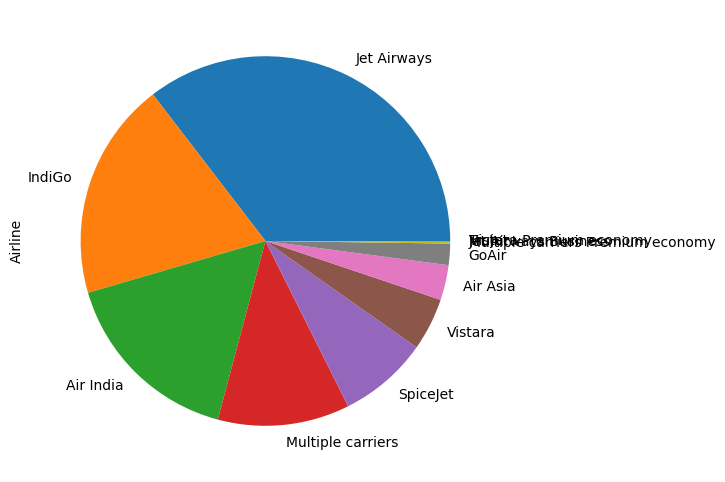


Airline:Source:Destination:Additional_Info Source
Uni-Variate Descriptive Stats:
Classes: ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Number of Classes: 5
Class Percent:
Delhi       41.891631
Kolkata     27.169302
Banglore    20.680679
Mumbai       6.594678
Chennai      3.663710
Name: Source, dtype: float64
---------------------------------------------------
Mode Value: Delhi

Visual Analysis:
-----------------------------------------------------


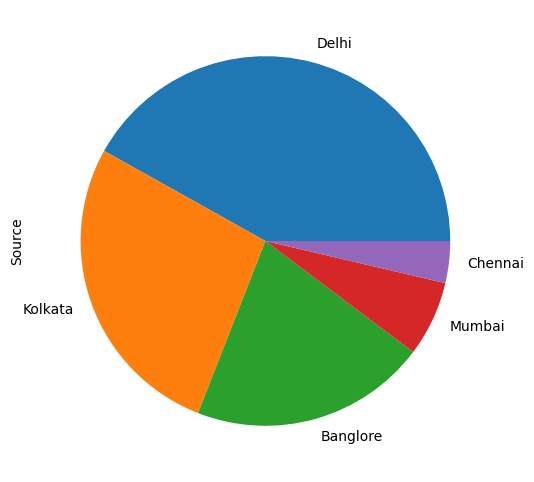


Airline:Source:Destination:Additional_Info Destination
Uni-Variate Descriptive Stats:
Classes: ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Number of Classes: 6
Class Percent:
Cochin       41.891631
Banglore     27.169302
Delhi        11.984188
New Delhi     8.696491
Hyderabad     6.594678
Kolkata       3.663710
Name: Destination, dtype: float64
---------------------------------------------------
Mode Value: Cochin

Visual Analysis:
-----------------------------------------------------


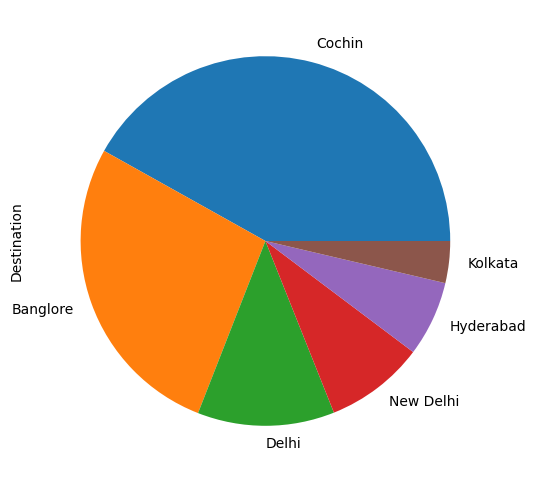


Airline:Source:Destination:Additional_Info Dep_Time
Uni-Variate Descriptive Stats:
Classes: ['Night' 'Morning' 'Evening' 'Afternoon']
Number of Classes: 4
Class Percent:
Morning      40.377941
Evening      26.610104
Afternoon    19.051292
Night        13.960663
Name: Dep_Time, dtype: float64
---------------------------------------------------
Mode Value: Morning

Visual Analysis:
-----------------------------------------------------


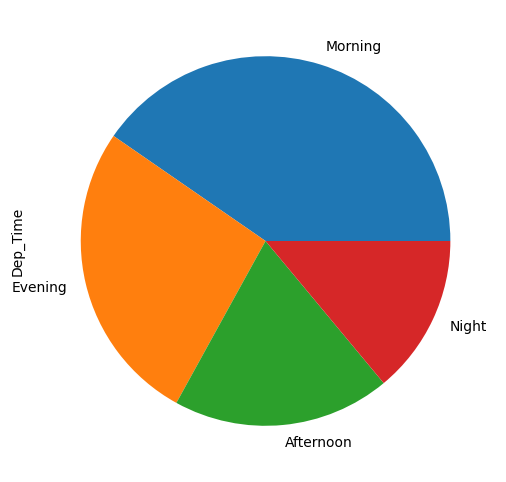


Airline:Source:Destination:Additional_Info Arrival_Time
Uni-Variate Descriptive Stats:
Classes: ['Night' 'Afternoon' 'Morning' 'Evening']
Number of Classes: 4
Class Percent:
Night        34.091786
Evening      28.586579
Morning      18.723486
Afternoon    18.598149
Name: Arrival_Time, dtype: float64
---------------------------------------------------
Mode Value: Night

Visual Analysis:
-----------------------------------------------------


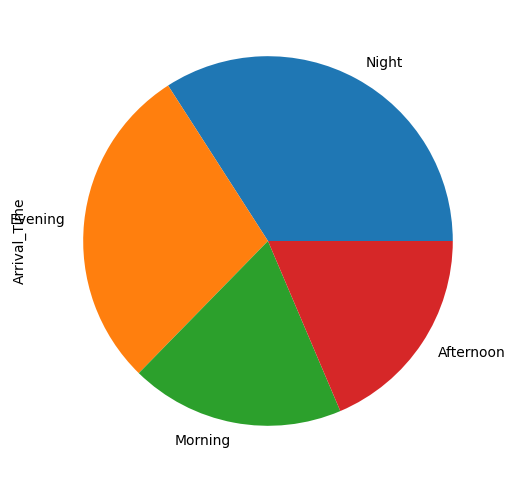


Numerical Column: Duration
Uni-Variate Descriptive Stats:
count    10372.0
mean       632.0
std        501.0
min         75.0
25%        170.0
50%        505.0
75%        915.0
max       2860.0
Name: Duration, dtype: float64
-----------------------------------------------------
Skewness & Kurtosis: 0.8972599791195046 , -0.06588886272068084

Visual Analysis:
-----------------------------------------------------


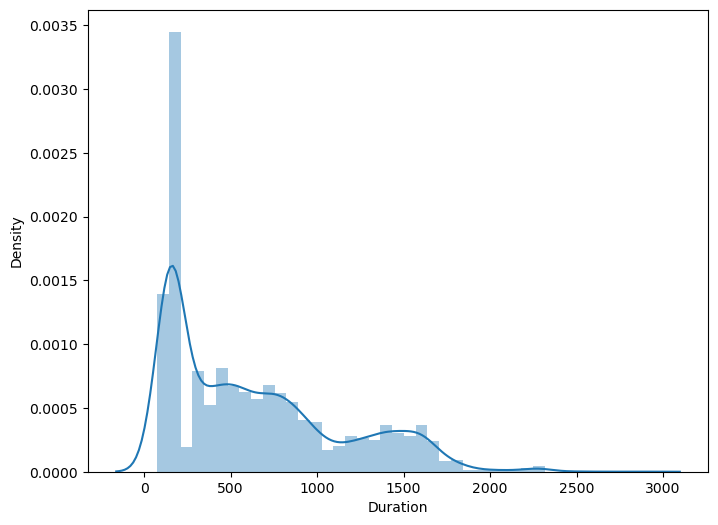


Numerical Column: Total_Stops
Uni-Variate Descriptive Stats:
count    10372.0
mean         1.0
std          1.0
min          0.0
25%          0.0
50%          1.0
75%          1.0
max          4.0
Name: Total_Stops, dtype: float64
-----------------------------------------------------
Skewness & Kurtosis: 0.32630120654332806 , -0.3510047140687069

Visual Analysis:
-----------------------------------------------------


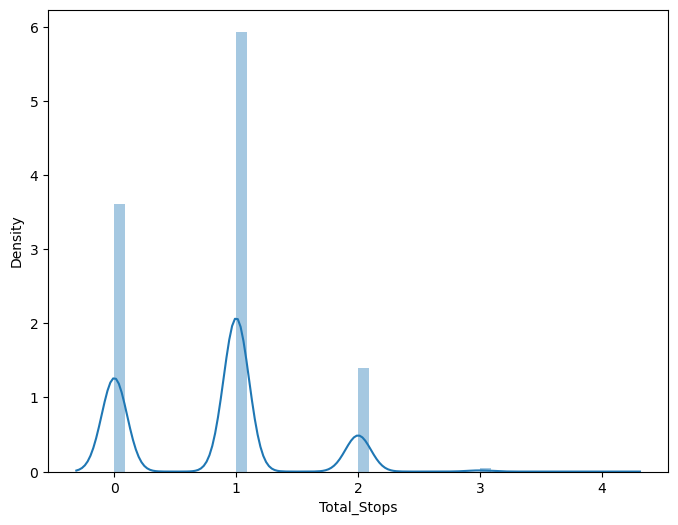


Airline:Source:Destination:Additional_Info Additional_Info
Uni-Variate Descriptive Stats:
Classes: ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
Number of Classes: 10
Class Percent:
No info                         78.133436
In-flight meal not included     18.453529
No check-in baggage included     3.065947
1 Long layover                   0.183185
Change airports                  0.067489
Business class                   0.038565
No Info                          0.028924
1 Short layover                  0.009641
Red-eye flight                   0.009641
2 Long layover                   0.009641
Name: Additional_Info, dtype: float64
---------------------------------------------------
Mode Value: No info

Visual Analysis:
-----------------------------------------------------


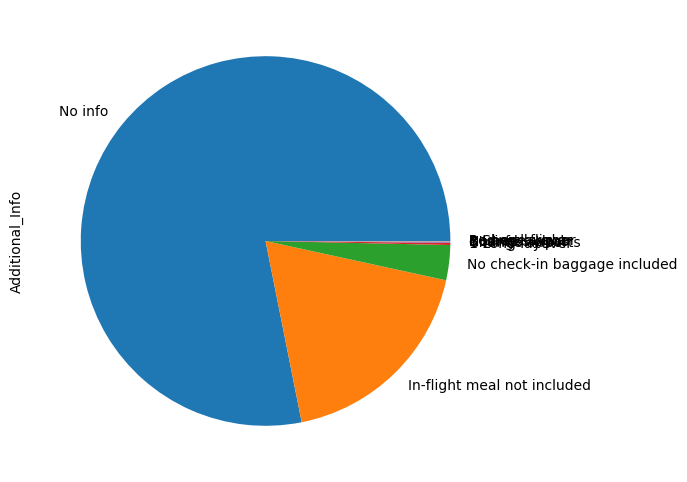


Numerical Column: Price
Uni-Variate Descriptive Stats:
count    10372.0
mean      9043.0
std       4624.0
min       1759.0
25%       5228.0
50%       8285.0
75%      12351.0
max      79512.0
Name: Price, dtype: float64
-----------------------------------------------------
Skewness & Kurtosis: 1.8612597324368227 , 13.622742478848501

Visual Analysis:
-----------------------------------------------------


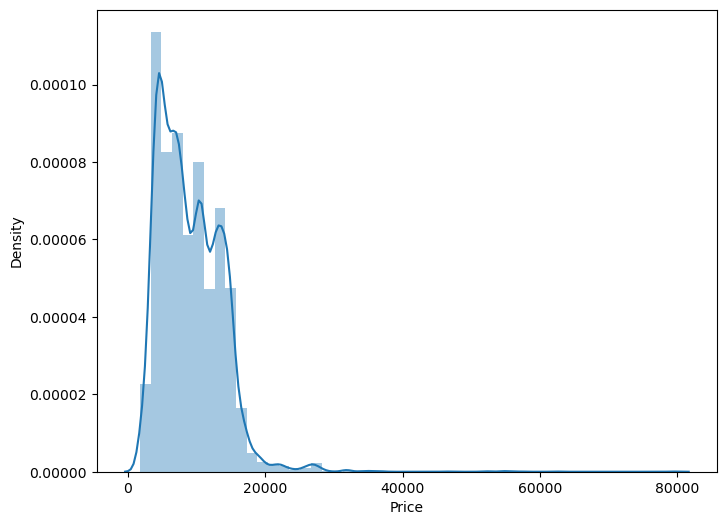


Numerical Column: Journey_Day
Uni-Variate Descriptive Stats:
count    10372.0
mean        13.0
std          8.0
min          1.0
25%          6.0
50%         12.0
75%         21.0
max         27.0
Name: Journey_Day, dtype: float64
-----------------------------------------------------
Skewness & Kurtosis: 0.12432537910624016 , -1.268471222046584

Visual Analysis:
-----------------------------------------------------


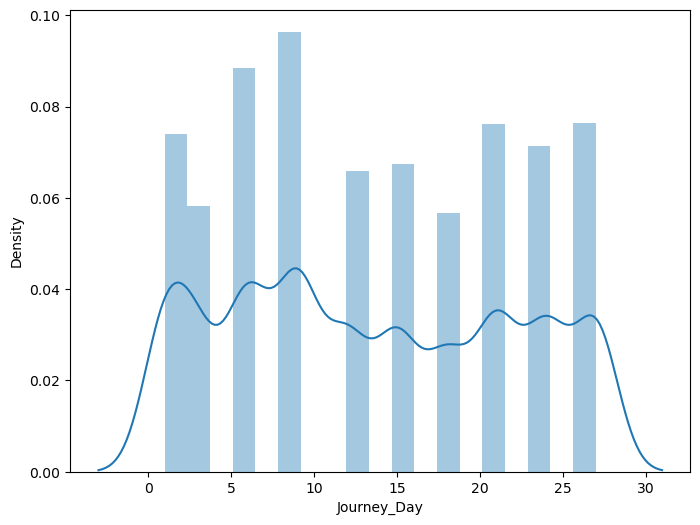


Numerical Column: Journey_Month
Uni-Variate Descriptive Stats:
count    10372.0
mean         5.0
std          1.0
min          3.0
25%          3.0
50%          5.0
75%          6.0
max          6.0
Name: Journey_Month, dtype: float64
-----------------------------------------------------
Skewness & Kurtosis: -0.3792424938070014 , -1.323167055247333

Visual Analysis:
-----------------------------------------------------


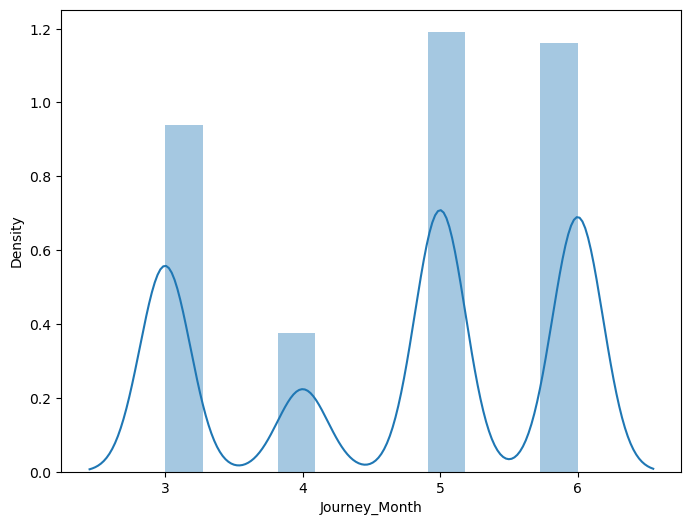


Numerical Column: weekday
Uni-Variate Descriptive Stats:
count    10372.0
mean         3.0
std          2.0
min          0.0
25%          1.0
50%          3.0
75%          5.0
max          6.0
Name: weekday, dtype: float64
-----------------------------------------------------
Skewness & Kurtosis: 0.043074293971114154 , -1.1925717470066302

Visual Analysis:
-----------------------------------------------------


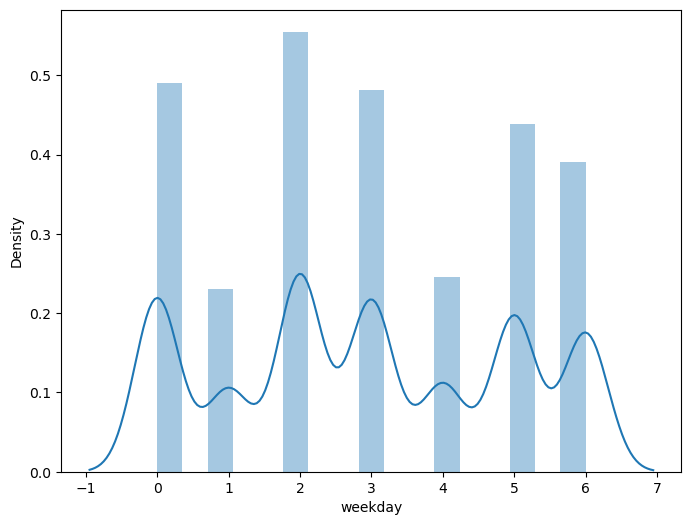

In [71]:
from  simple_colors import *

for i in data.columns:
    if data[i].dtype == 'object':
        print()
        print(green("Airline:Source:Destination:Additional_Info",['bold']), i)
        print("=====================================================")
        print(green("Uni-Variate Descriptive Stats:",['bold']))
        print(black("Classes:", ['bold']), data[i].unique())
        print(black("Number of Classes:",['bold']), data[i].nunique())
        print(black('Class Percent:',['bold']))
        print((data[i].value_counts()/data[i].value_counts().sum())*100)
        print("---------------------------------------------------")
        print(black("Mode Value:",['bold']), data[i].mode()[0])
        if i!='Amenities_Cleaned' and i!='Flooring':
            print()
            print(magenta("Visual Analysis:",['bold']))
            print("-----------------------------------------------------")
            plt.figure(figsize = (8,6))
            data[i].value_counts().plot(kind = 'pie')
            plt.show()        
        
    elif data[i].dtype != 'object':
        print()
        print(blue("Numerical Column:",['bold']), i)
        print("=====================================================")
        print(green("Uni-Variate Descriptive Stats:",['bold']))
        print(round(data[i].describe(),))
        print("-----------------------------------------------------")
        print(black("Skewness & Kurtosis:",['bold']), data[i].skew(), ",", data[i].kurt())
        print()
        print(cyan("Visual Analysis:",['bold']))
        print("-----------------------------------------------------")
        plt.figure(figsize = (8,6))
        sns.distplot(data[i])
        #data[i].plot(kind = 'density')
        plt.show()

Insights(uni-varaite)

-Among all the airline, Air India has the highest number of passengers

-Delhi is the highest source city it having 41% of passengers

-Cochin is the highest destination city it having 41% of passengers

-According to the data morning is the most preferred departure time

-Acoording to the data night is the most preferred arrival time

-50% of the flight duration is 505 minutes

-75% of the flights are 1 stop

-78% additional info doesnt have any information

-most of the passengers preferred journey day is saturday

-most of the passengerd preferred journey month is june


Bi-variate

In [72]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,Morning,Night,1140,2,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,Evening,Night,325,1,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,Evening,Night,285,1,No info,13302,1,3,4


Taking journey month vs price (n-n)

Text(0, 0.5, 'Price')

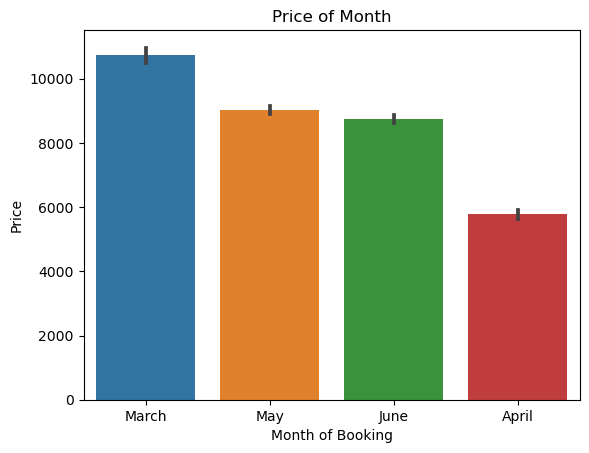

In [73]:
v1=sns.barplot(x='Journey_Month',y='Price',data=df1)
v1.set_title('Price of Month')
v1.set_xlabel('Month of Booking')
v1.set_ylabel('Price')



By seeing the bar plot in the month of march price is high compare to other months.

In [74]:
monthly_avg=df1.groupby(['Journey_Month']).agg({'Price':np.mean}).reset_index()

<AxesSubplot:xlabel='Journey_Month'>

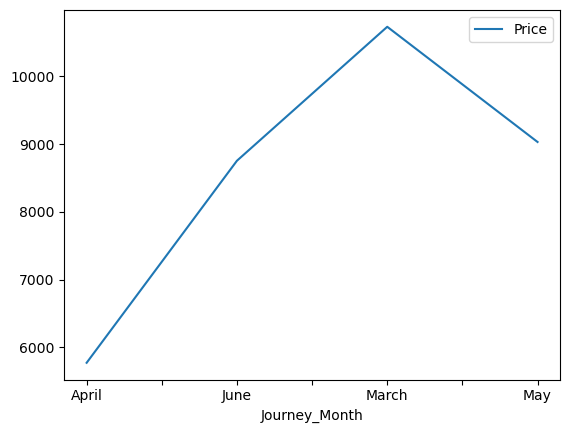

In [75]:
monthly_avg.plot(x='Journey_Month',y='Price')

Taking Destination vs Price( c-n )

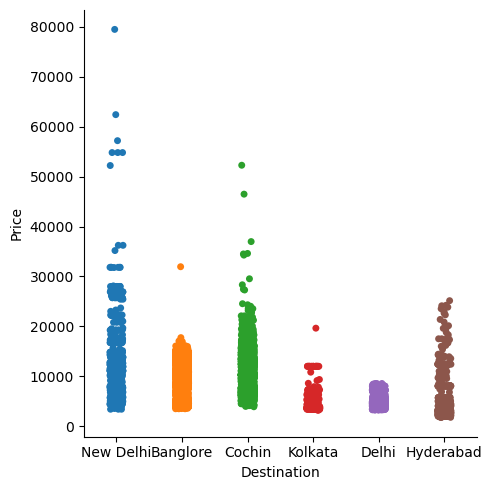

In [76]:
sns.catplot(y='Price',x='Destination',data=df1)

As per the catplot New Delhi(Destination) is showing the highest price.


Taking Source vs Price (c - n)

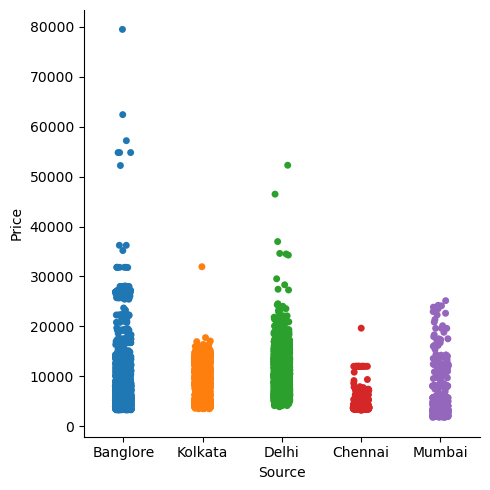

In [77]:
sns.catplot(x='Source',y='Price',data=df1)

As per the catplot Banglore (source destination) is having the highest price.

Taking Airline vs Price (c-n)

<AxesSubplot:xlabel='Price', ylabel='Airline'>

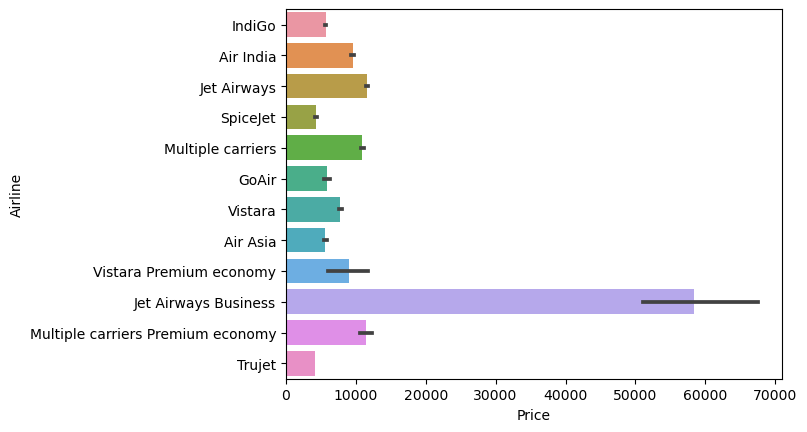

In [78]:
sns.barplot(y='Airline',x='Price',data=df1,orient='h')

From the above diagram jet airways having the highest price compare to other airways

Taking Duration vs Price (n-n)

<AxesSubplot:xlabel='Duration', ylabel='Price'>

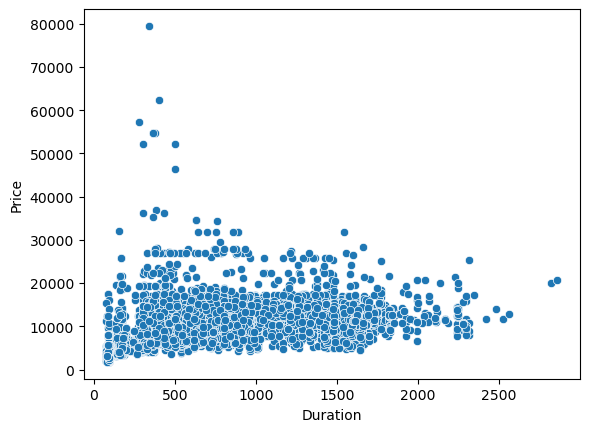

In [79]:
sns.scatterplot(x='Duration',y='Price',data=df1)

By seeing the above diagram we are unable write the insight so that we can consider other columns.

Taking Departure time vs Price (c-n)

<AxesSubplot:xlabel='Dep_Time', ylabel='Price'>

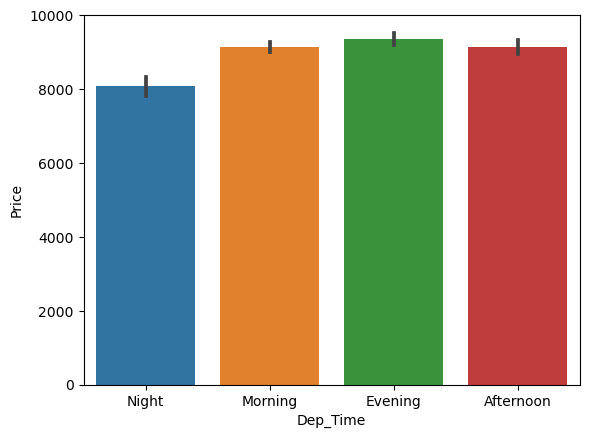

In [80]:
sns.barplot(x='Dep_Time',y= 'Price',data=df1)

Above barplot shows evening departure time having the highest  price

Taking Arrival time vs price (c-n)

<AxesSubplot:xlabel='Arrival_Time', ylabel='Price'>

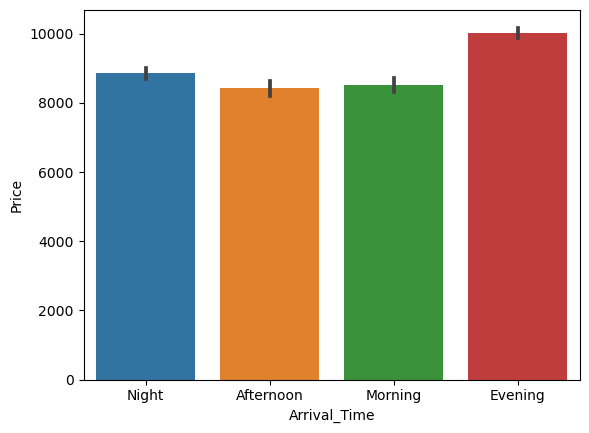

In [81]:
sns.barplot(x='Arrival_Time',y= 'Price',data=df1)

Above barplot shows evening Arrival time having the highest  price

Taking total stops vs price(n-n)

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

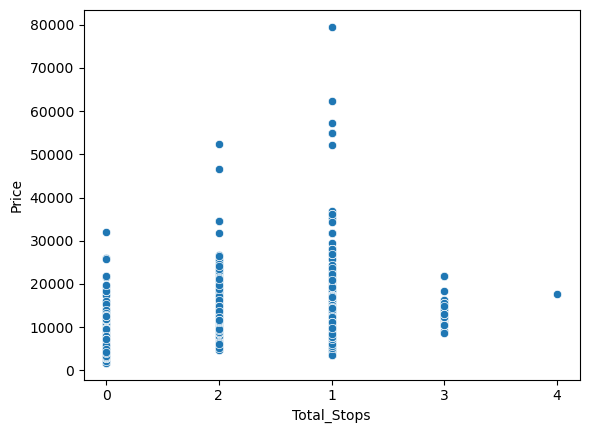

In [82]:
sns.scatterplot(x='Total_Stops',y='Price',data=df1)

so we all know that direct flight fares are high compare to multiple stop flights

Taking weekday vs price (n-n)

<AxesSubplot:xlabel='weekday', ylabel='Price'>

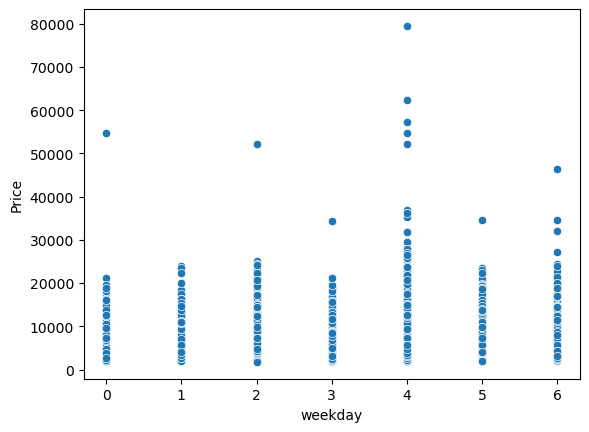

In [83]:
sns.scatterplot(x='weekday',y='Price',data=df1)

As we see that 4(friday) are the most expensive price compare to other days

**Mutli-variate**

In [84]:
df1.corr()

,Duration,Price
Duration,1.000000,0.500092
Price,0.500092,1.000000


<AxesSubplot:>

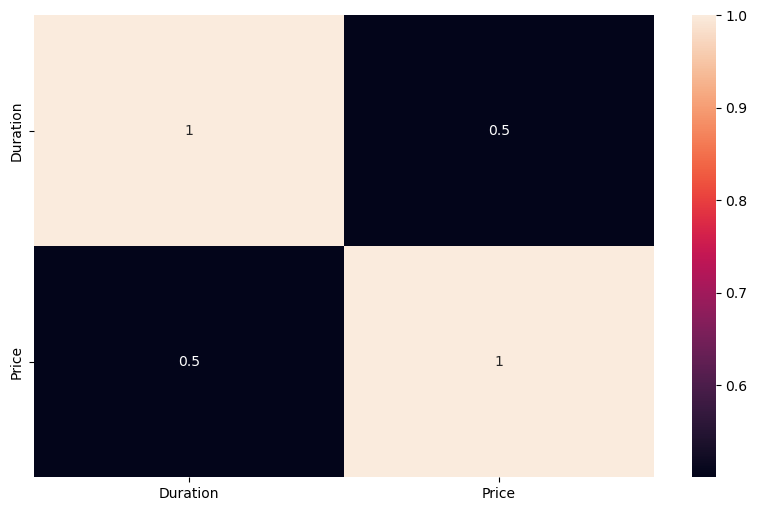

In [85]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),annot=True)

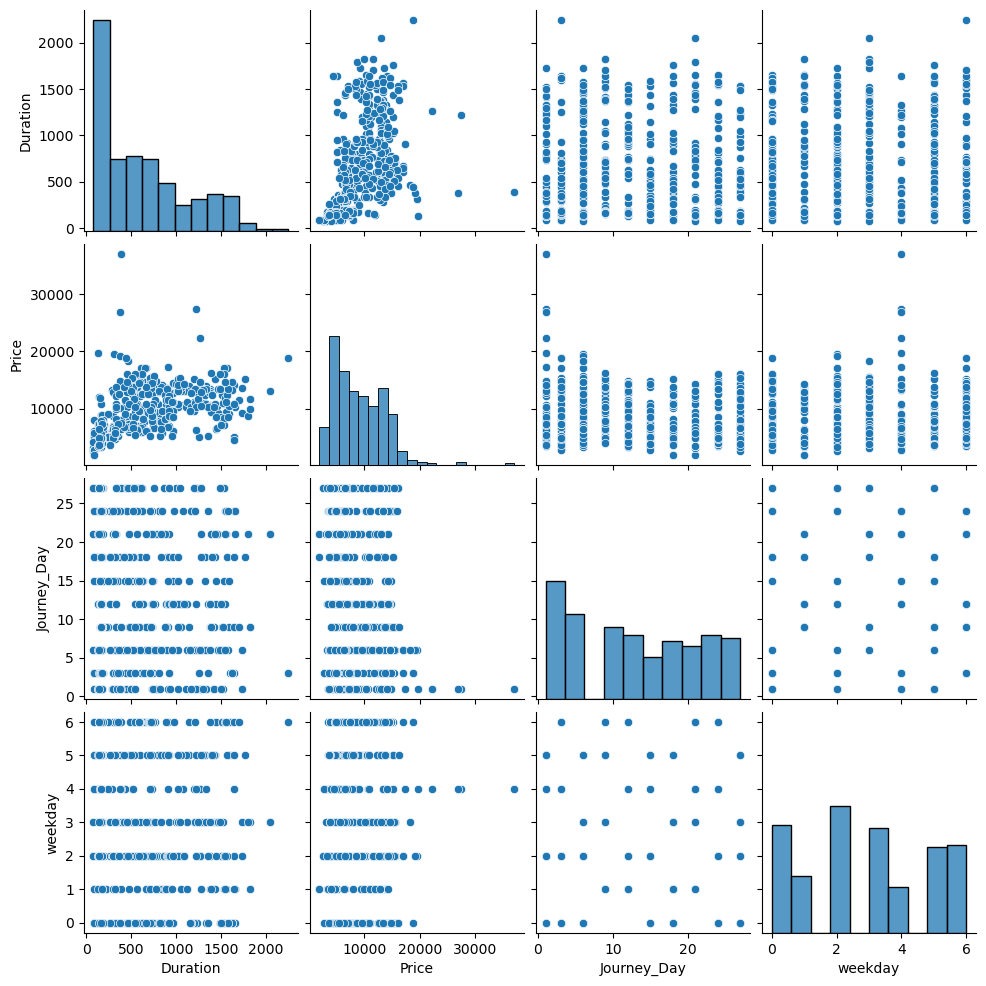

In [86]:
sns.pairplot(df1.iloc[0:500])

In [87]:
df1.groupby(['Airline','Source','Destination']).agg({'Price':np.mean}).sort_values(by='Price',ascending=False)

Price
Airline                           Source   Destination              
Jet Airways Business              Banglore New Delhi    62844.250000
                                  Delhi    Cochin       49387.500000
Jet Airways                       Banglore New Delhi    15102.277778
                                  Delhi    Cochin       12626.772601
Vistara                           Mumbai   Hyderabad    12326.521739
Vistara Premium economy           Banglore New Delhi    11793.000000
Jet Airways                       Kolkata  Banglore     11705.532036
Multiple carriers Premium economy Delhi    Cochin       11418.846154
Air India                         Banglore New Delhi    11024.679426
Multiple carriers                 Delhi    Cochin       10902.678094
Air India                         Kolkata  Banglore     10296.273453
                                  Delhi    Cochin        9960.348506
Vistara                           Kolkata  Banglore      9257.683060
Vistara Premium economy           Chennai  Kolkata       9125.000000
Vistara                           Banglore New Delhi     9041.307692
Air Asia                          Delhi    Cochin        7804.175000
GoAir                             Banglore New Delhi     7532.333333
Vistara                           Chennai  Kolkata       7491.372093
IndiGo                            Banglore New Delhi     7422.600000
                                  Delhi    Cochin        7203.933333
GoAir                             Kolkata  Banglore      7047.000000
                                  Delhi    Cochin        6587.157895
Vistara                           Delhi    Cochin        6465.644444
Jet Airways                       Banglore Delhi         6412.954054
SpiceJet                          Banglore New Delhi     6313.121951
Air India                         Mumbai   Hyderabad     6260.051471
Jet Airways                       Mumbai   Hyderabad     6227.949772
Air India                         Banglore Delhi         6045.166667
Vistara Premium economy           Banglore Delhi         5969.000000
SpiceJet                          Delhi    Cochin        5916.356322
Air India                         Chennai  Kolkata       5895.640000
Air Asia                          Banglore New Delhi     5869.000000
IndiGo                            Kolkata  Banglore      5078.814554
Vistara                           Banglore Delhi         5042.312977
Air Asia                          Kolkata  Banglore      5012.320000
SpiceJet                          Kolkata  Banglore      4642.883333
IndiGo                            Chennai  Kolkata       4539.928962
                                  Banglore Delhi         4393.898256
Air Asia                          Banglore Delhi         4265.577465
Trujet                            Mumbai   Hyderabad     4140.000000
GoAir                             Banglore Delhi         4050.289855
SpiceJet                          Banglore Delhi         4012.839416
                                  Chennai  Kolkata       3993.523438
IndiGo                            Mumbai   Hyderabad     3632.169399
SpiceJet                          Mumbai   Hyderabad     2511.106557

In [88]:
rawdata

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,Morning,Night,1140,2,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,Evening,Night,325,1,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,Evening,Night,285,1,No info,13302,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10367,Air Asia,Kolkata,Banglore,Evening,Night,150,0,No info,4107,9,4,1
10368,Air India,Kolkata,Banglore,Evening,Night,155,0,No info,4145,27,4,5
10369,Jet Airways,Banglore,Delhi,Morning,Afternoon,180,0,No info,7229,27,4,5
10370,Vistara,Banglore,New Delhi,Afternoon,Afternoon,160,0,No info,12648,1,3,4


**Insights**


Uni- variate

Numerical

-Among all the airline, Air India has the highest number of passengers

-Delhi is the highest source city it having 41% of passengers

-Cochin is the highest destination city it having 41% of passengers

-According to the data morning is the most preferred departure time

-Acoording to the data night is the most preferred arrival time


Categorical

-50% of the flight duration is 505 minutes

-75% of the flights are 1 stop

-78% additional info doesnt have any information

-most of the passengers preferred journey day is saturday

-most of the passengerd preferred journey month is june



Bi- variate

-By seeing the bar plot in the month of march price is high compare to other months.

-As per the catplot New Delhi(Destination) is showing the highest price.

-As per the catplot Banglore (source destination) is having the highest price.

-From the above diagram jet airways having the highest price compare to other airways.

-By seeing the above diagram we are unable write the insight so that we can consider other columns.

-Above barplot shows evening departure time having the highest  price.

-Above barplot shows evening Arrival time having the highest  price.

-so we all know that direct flight fares are high compare to multiple stop flights.

-As we see that 4(friday) are the most expensive price compare to other days








In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10372 entries, 0 to 10371
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10372 non-null  object
 1   Source           10372 non-null  object
 2   Destination      10372 non-null  object
 3   Dep_Time         10372 non-null  object
 4   Arrival_Time     10372 non-null  object
 5   Duration         10372 non-null  int32 
 6   Total_Stops      10372 non-null  object
 7   Additional_Info  10372 non-null  object
 8   Price            10372 non-null  int64 
 9   Journey_Day      10372 non-null  object
 10  Journey_Month    10372 non-null  object
 11  weekday          10372 non-null  object
dtypes: int32(1), int64(1), object(10)
memory usage: 932.0+ KB


**Predictive modeling**

input(x) and output (y)

In [90]:
df1.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,3897,24,March,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,7662,1,May,2
2,Jet Airways,Delhi,Cochin,Morning,Night,1140,2,No info,13882,9,June,6
3,IndiGo,Kolkata,Banglore,Evening,Night,325,1,No info,6218,12,May,6
4,IndiGo,Banglore,New Delhi,Evening,Night,285,1,No info,13302,1,March,4


we are predicting price values ,so our output column will be price,remaining are input columns

In [91]:
x=df1.drop(['Price'],axis=1)
y=df1['Price']

In [92]:
x.head(5)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,24,March,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,1,May,2
2,Jet Airways,Delhi,Cochin,Morning,Night,1140,2,No info,9,June,6
3,IndiGo,Kolkata,Banglore,Evening,Night,325,1,No info,12,May,6
4,IndiGo,Banglore,New Delhi,Evening,Night,285,1,No info,1,March,4


In [93]:
y.head(5)

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

Feature Engineering(select proper x data for modeling)

* Feature selection/Deletion

The above step can be done through the help of EDA and Business decisions

* Feature Modification (Changing the Values)
* Feature Generation (Creating New Features)

In [94]:
x.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,24,March,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,1,May,2
2,Jet Airways,Delhi,Cochin,Morning,Night,1140,2,No info,9,June,6
3,IndiGo,Kolkata,Banglore,Evening,Night,325,1,No info,12,May,6
4,IndiGo,Banglore,New Delhi,Evening,Night,285,1,No info,1,March,4


In [95]:
x.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Journey_Day',
       'Journey_Month', 'weekday'],
      dtype='object')

In [96]:
correlation=df1['Duration'].corr(df1['Price'])

In [97]:
correlation

0.5000915406718855

Checking missing values percentage

In [98]:
x.isnull().sum()/10372

Airline            0.0
Source             0.0
Destination        0.0
Dep_Time           0.0
Arrival_Time       0.0
Duration           0.0
Total_Stops        0.0
Additional_Info    0.0
Journey_Day        0.0
Journey_Month      0.0
weekday            0.0
dtype: float64

In [99]:
x.shape

(10372, 11)

In [100]:
x.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,24,March,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,1,May,2
2,Jet Airways,Delhi,Cochin,Morning,Night,1140,2,No info,9,June,6
3,IndiGo,Kolkata,Banglore,Evening,Night,325,1,No info,12,May,6
4,IndiGo,Banglore,New Delhi,Evening,Night,285,1,No info,1,March,4


 Feature Modification/Generation**

* We have two features **(------------)** which values are in list, need to convert them to regular values by one hot encoding after replacing the missing values

Dividing Data (x,y) into train and test (Data Validation)**

* for this we will use sklearn module
* we can go with 70,30 or 80,20 or 75,25 ratios

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=123)

In [103]:
xtrain.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
9308,Multiple carriers,Delhi,Cochin,Afternoon,Night,480,1,No info,21,March,3
239,Multiple carriers,Delhi,Cochin,Morning,Evening,615,1,No info,24,June,0
5627,Jet Airways,Banglore,New Delhi,Afternoon,Night,435,1,No info,1,March,4
6095,IndiGo,Banglore,New Delhi,Morning,Afternoon,180,0,No info,3,March,6
2745,IndiGo,Banglore,Delhi,Night,Night,180,0,No info,12,May,6


In [104]:
xtrain['Journey_Day']=xtrain["Journey_Day"].astype(int)
xtrain['Total_Stops']=xtrain['Total_Stops'].astype(int)
xtrain['weekday']=xtrain['weekday'].astype(int)

In [105]:
xtest['Journey_Day']=xtest['Journey_Day'].astype(int)
xtest['Total_Stops']=xtest['Total_Stops'].astype(int)
xtest['weekday']=xtest['weekday'].astype(int)

In [106]:
xtest.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
3394,IndiGo,Delhi,Cochin,Evening,Night,300,1,No info,27,June,3
5769,Vistara,Banglore,New Delhi,Morning,Morning,160,0,No info,3,March,6
1535,IndiGo,Delhi,Cochin,Afternoon,Night,490,1,No info,6,June,3
6745,GoAir,Delhi,Cochin,Morning,Evening,535,1,No info,27,March,2
2739,Air India,Delhi,Cochin,Afternoon,Night,570,1,No info,21,March,3


In [107]:
xtrain=xtrain.reset_index(drop=True)
xtest=xtest.reset_index(drop=True)
ytrain=ytrain.reset_index(drop=True)
ytest=ytest.reset_index(drop=True)

In [108]:
xtrain.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,Multiple carriers,Delhi,Cochin,Afternoon,Night,480,1,No info,21,March,3
1,Multiple carriers,Delhi,Cochin,Morning,Evening,615,1,No info,24,June,0
2,Jet Airways,Banglore,New Delhi,Afternoon,Night,435,1,No info,1,March,4
3,IndiGo,Banglore,New Delhi,Morning,Afternoon,180,0,No info,3,March,6
4,IndiGo,Banglore,Delhi,Night,Night,180,0,No info,12,May,6


In [109]:
ytrain.shape,ytest.shape

((7779,), (2593,))

Handling Missing Values & Outliers for rawdata and test data

In [110]:
xtrain.isnull().sum()

Airline            0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Journey_Day        0
Journey_Month      0
weekday            0
dtype: int64

xtrain

In [111]:
indx = xtrain[xtrain.isnull().sum(axis=1)>=7].index

In [112]:
xtrain.drop(indx, axis = 0, inplace = True)

In [113]:
xtrain.shape

(7779, 11)

xtest

In [114]:
indxtest = xtest[xtest.isnull().sum(axis=1)>=7].index

In [115]:
xtest.drop(indxtest, axis = 0, inplace = True)

In [116]:
xtest.shape

(2593, 11)

In [117]:
def drop(x,y):
    indxs = y.index
    for i in indxs:
        if i not in x.index:
            y.drop(i, axis = 0, inplace = True)

In [118]:
drop(xtrain, ytrain)
drop(xtest, ytest)

In [119]:
xtrain.shape, ytrain.shape

((7779, 11), (7779,))

In [120]:
xtest.shape, ytest.shape

((2593, 11), (2593,))

**Handling Na column wise**

In [121]:
xtrain.isnull().sum()

Airline            0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Journey_Day        0
Journey_Month      0
weekday            0
dtype: int64

In [122]:
xtest.isnull().sum()

Airline            0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Journey_Day        0
Journey_Month      0
weekday            0
dtype: int64

# Import label encoder 
colnames = list(rawdata.columns)
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
for col in colnames:
    if rawdata[col].dtype==object:
        rawdata[col]= label_encoder.fit_transform(rawdata[col]) 

cat_var=["Airline","Source","Destination","Dep_Time","Arrival_Time","Total_Stops","Additional_Info","Journey_Day","Journey_Month","weekday"] 
catdf=rawdata[cat_var]

In [123]:
#catdf.head()

outliers for numeric data

In [124]:
def outlier_detect(df):
    for i in df.describe().columns:
        print("Column:",i)
        print("------------------------------------------------")
        Q1 = df.describe().at['25%',i]
        Q3 = df.describe().at['75%',i]
        IQR = Q3 - Q1
        LTV = Q1 - 1.5 * IQR
        UTV = Q3 + 1.5 * IQR
        
#         fifth = df[i].quantile(0.05)
#         ninetyfifth = df[i].quantile(0.95)
        
        
        print("Lower Outliers:")
        print()
        lowerout = list(df[df[i]<LTV][i])
        lowerout.sort()
        print(lowerout)
        print()
        # mask method is used to replace the values
        df[i] = df[i].mask(df[i]<LTV, round(LTV,0)) # replacing the outlier with ltv (25% value)
        
        print("Upper Outliers:")
        print()
        upperout = list(df[df[i]>UTV][i])
        upperout.sort()
        print(upperout) 
        print()
        
        # mask method is used to replace the values
        df[i] = df[i].mask(df[i]>UTV, round(UTV,0)) # replacing the outlier with utv (75% value)
    return df

In [125]:


rawdata = outlier_detect(test)

Column: Total_Stops
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4]

Column: Journey_Day
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[]

Column: Journey_Month
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[]

Column: weekday
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[]



In [126]:
outlier_detect(rawdata), outlier_detect(test)

Column: Total_Stops
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[]

Column: Journey_Day
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[]

Column: Journey_Month
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[]

Column: weekday
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[]

Column: Total_Stops
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[]

Column: Journey_Day
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[]

Column: Journey_Month
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[]

Column: weekday
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[]



(                Airline    Source Destination   Dep_Time Arrival_Time  \
 0           Jet Airways     Delhi      Cochin    Evening        Night   
 1                IndiGo   Kolkata    Banglore    Morning      Morning   
 2           Jet Airways     Delhi      Cochin    Evening      Evening   
 3     Multiple carriers     Delhi      Cochin    Morning        Night   
 4              Air Asia  Banglore       Delhi      Night        Night   
 ...                 ...       ...         ...        ...          ...   
 2666          Air India   Kolkata    Banglore    Evening      Evening   
 2667             IndiGo   Kolkata    Banglore  Afternoon      Evening   
 2668        Jet Airways     Delhi      Cochin      Night        Night   
 2669          Air India     Delhi      Cochin      Night      Evening   
 2670  Multiple carriers     Delhi      Cochin      Night      Evening   
 
      Duration  Total_Stops              Additional_Info  Journey_Day  \
 0         655          1.0          

In [127]:
xtrain.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,Multiple carriers,Delhi,Cochin,Afternoon,Night,480,1,No info,21,March,3
1,Multiple carriers,Delhi,Cochin,Morning,Evening,615,1,No info,24,June,0
2,Jet Airways,Banglore,New Delhi,Afternoon,Night,435,1,No info,1,March,4
3,IndiGo,Banglore,New Delhi,Morning,Afternoon,180,0,No info,3,March,6
4,IndiGo,Banglore,Delhi,Night,Night,180,0,No info,12,May,6


In [128]:
xtest.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,IndiGo,Delhi,Cochin,Evening,Night,300,1,No info,27,June,3
1,Vistara,Banglore,New Delhi,Morning,Morning,160,0,No info,3,March,6
2,IndiGo,Delhi,Cochin,Afternoon,Night,490,1,No info,6,June,3
3,GoAir,Delhi,Cochin,Morning,Evening,535,1,No info,27,March,2
4,Air India,Delhi,Cochin,Afternoon,Night,570,1,No info,21,March,3


In [129]:
ytrain.head()

0    13062
1    12524
2    36235
3     6860
4     3943
Name: Price, dtype: int64

In [130]:
ytest.head()

0    6069
1    8028
2    6938
3    5281
4    5704
Name: Price, dtype: int64

Data Pre-Processing (rawdata, test)

Categorical to Numerical (Encoding)

Machine needs data in numeric format, so we need to convert categorical to numerical, while observing the number of classes , because it will increase the dimensionality if we are converting them to one hot encoding.

* Label Encoding for ordinal
    - lets assume cat column data : platinum, gold, silver
    - ordinal - platinum>gold>silver
                3>2>1
* One hot encodig for nominal
    - lets assume cat column data: a, b, c

a|b|c
--|--|--
1|0|0
1|0|0
0|1|0
0|0|1

nominal data- Airlines,Source, Destination,Additional info

ordinal data-Dep time, Arrival time,Journey month

Dep_Time(Ordinal)

In [131]:
xtrain.Dep_Time.value_counts()


Morning      3143
Evening      2046
Afternoon    1479
Night        1111
Name: Dep_Time, dtype: int64

In [132]:
xtest.Dep_Time.value_counts()

Morning      1045
Evening       714
Afternoon     497
Night         337
Name: Dep_Time, dtype: int64

In [133]:
pd.concat([xtest, ytest], axis = 1).groupby('Dep_Time')['Price'].mean()

Dep_Time
Afternoon    9084.696177
Evening      9214.086835
Morning      9084.057416
Night        8435.860534
Name: Price, dtype: float64

In [134]:
pd.concat([xtrain, ytrain], axis = 1).groupby('Dep_Time')['Price'].mean()

Dep_Time
Afternoon    9156.737661
Evening      9412.187195
Morning      9140.198536
Night        7956.292529
Name: Price, dtype: float64

In [135]:
xtrain.Dep_Time.replace({'Evening':9412, 'Afternoon':9156, 'Morning':9140, 'Night':7956}, inplace = True)

In [136]:
xtest.Dep_Time.replace({'Evening':8934, 'Afternoon':8761, 'Morning':8927, 'Night':9811}, inplace = True)

In [137]:
xtrain.Dep_Time.head()

0    9156
1    9140
2    9156
3    9140
4    7956
Name: Dep_Time, dtype: int64

In [138]:
xtest.Dep_Time.head()

0    8934
1    8927
2    8761
3    8927
4    8761
Name: Dep_Time, dtype: int64

Arrival_Time(ordinal)

In [139]:
pd.concat([xtrain, ytrain], axis = 1).groupby('Arrival_Time')['Price'].mean()

Arrival_Time
Afternoon     8428.058621
Evening      10007.761607
Morning       8478.522074
Night         8876.901953
Name: Price, dtype: float64

In [140]:
pd.concat([xtest, ytest], axis = 1).groupby('Arrival_Time')['Price'].mean()

Arrival_Time
Afternoon     8399.649269
Evening      10061.699310
Morning       8616.019417
Night         8780.621281
Name: Price, dtype: float64

In [141]:
pd.concat([xtrain, ytrain], axis = 1).groupby('Arrival_Time')['Price'].mean()

Arrival_Time
Afternoon     8428.058621
Evening      10007.761607
Morning       8478.522074
Night         8876.901953
Name: Price, dtype: float64

In [142]:
pd.concat([xtest, ytest], axis = 1).groupby('Arrival_Time')['Price'].mean()

Arrival_Time
Afternoon     8399.649269
Evening      10061.699310
Morning       8616.019417
Night         8780.621281
Name: Price, dtype: float64

In [143]:
xtrain.Arrival_Time.replace({'Evening':10007, 'Night':8876, 'Morning':8478, 'Afternoon':8428}, inplace = True)

In [144]:
xtest.Arrival_Time.replace({'Evening':10061, 'Night':8780, 'Morning':8616, 'Afternoon':8399}, inplace = True)

In [145]:
xtrain.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,Multiple carriers,Delhi,Cochin,9156,8876,480,1,No info,21,March,3
1,Multiple carriers,Delhi,Cochin,9140,10007,615,1,No info,24,June,0
2,Jet Airways,Banglore,New Delhi,9156,8876,435,1,No info,1,March,4
3,IndiGo,Banglore,New Delhi,9140,8428,180,0,No info,3,March,6
4,IndiGo,Banglore,Delhi,7956,8876,180,0,No info,12,May,6


In [146]:
xtrain.Journey_Month.value_counts()

May      2528
June     2487
March    1970
April     794
Name: Journey_Month, dtype: int64

In [147]:
xtest.Journey_Month.value_counts()

May      844
June     796
March    684
April    269
Name: Journey_Month, dtype: int64

In [148]:
xtrain.Journey_Month.replace({'May':5, 'June':6, 'March':3, 'April':4}, inplace = True)

In [149]:
xtest.Journey_Month.replace({'May':5, 'June':6, 'March':3, 'April':4}, inplace = True)

In [150]:
xtrain.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,Multiple carriers,Delhi,Cochin,9156,8876,480,1,No info,21,3,3
1,Multiple carriers,Delhi,Cochin,9140,10007,615,1,No info,24,6,0
2,Jet Airways,Banglore,New Delhi,9156,8876,435,1,No info,1,3,4
3,IndiGo,Banglore,New Delhi,9140,8428,180,0,No info,3,3,6
4,IndiGo,Banglore,Delhi,7956,8876,180,0,No info,12,5,6


In [151]:
xtest.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,IndiGo,Delhi,Cochin,8934,8780,300,1,No info,27,6,3
1,Vistara,Banglore,New Delhi,8927,8616,160,0,No info,3,3,6
2,IndiGo,Delhi,Cochin,8761,8780,490,1,No info,6,6,3
3,GoAir,Delhi,Cochin,8927,10061,535,1,No info,27,3,2
4,Air India,Delhi,Cochin,8761,8780,570,1,No info,21,3,3


Airlines,source,destination,additional info(nominal)

In [152]:
from sklearn.preprocessing import OneHotEncoder

In [153]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=True)

using one hot encoder will remember the data , also it will be used to ignore on the unknown data classes

we will be using the command fit_transform to train and convert the classes into one hot encoding

In [154]:
ohedata_train = ohe.fit_transform(xtrain[['Airline','Source','Destination','Additional_Info']]).toarray()

In [155]:
ohedata_train.shape

(7779, 31)

In [156]:
# Converting the one hot data to a data frame with col names

ohedata_train = pd.DataFrame(ohedata_train, columns = ohe.get_feature_names_out())

In [157]:
xtrain=pd.concat([xtrain,ohedata_train],axis=1)

In [158]:
xtrain.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info
0,Multiple carriers,Delhi,Cochin,9156,8876,480,1,No info,21,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Multiple carriers,Delhi,Cochin,9140,10007,615,1,No info,24,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Jet Airways,Banglore,New Delhi,9156,8876,435,1,No info,1,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,IndiGo,Banglore,New Delhi,9140,8428,180,0,No info,3,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,IndiGo,Banglore,Delhi,7956,8876,180,0,No info,12,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [159]:
xtrain=xtrain.drop(['Airline','Source','Destination','Additional_Info'],axis=1)

we will be using trained **ohe** to transform test data

In [160]:
ohedata_test = ohe.transform(xtest[['Airline','Source','Destination','Additional_Info']]).toarray()

In [161]:
ohedata_test = pd.DataFrame(ohedata_test, columns = ohe.get_feature_names_out())

In [162]:
xtrain.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Journey_Day,Journey_Month,weekday,Airline_Air Asia,Airline_Air India,Airline_GoAir,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info
0,9156,8876,480,1,21,3,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,9140,10007,615,1,24,6,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,9156,8876,435,1,1,3,4,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,9140,8428,180,0,3,3,6,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,7956,8876,180,0,12,5,6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [163]:
xtest=pd.concat([xtest,ohedata_test],axis=1)

In [164]:
xtest=xtest.drop(['Airline','Source','Destination','Additional_Info'],axis=1)

In [165]:
xtest.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Journey_Day,Journey_Month,weekday,Airline_Air Asia,Airline_Air India,Airline_GoAir,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info
0,8934,8780,300,1,27,6,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,8927,8616,160,0,3,3,6,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,8761,8780,490,1,6,6,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,8927,10061,535,1,27,3,2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,8761,8780,570,1,21,3,3,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Scaling 

In [166]:
from sklearn.preprocessing import StandardScaler

In [167]:
sc = StandardScaler()

In [168]:
xtrain.iloc[:,0:3]

,Dep_Time,Arrival_Time,Duration
0,9156,8876,480
1,9140,10007,615
2,9156,8876,435
3,9140,8428,180
4,7956,8876,180
...,...,...,...
7774,9140,8876,1025
7775,9156,10007,375
7776,9412,10007,1285
7777,9156,8876,845


In [169]:
xtrain.iloc[:,0:3] = sc.fit_transform(xtrain.iloc[:,0:3])

In [170]:
xtrain.dtypes

Dep_Time                                        float64
Arrival_Time                                    float64
Duration                                        float64
Total_Stops                                       int32
Journey_Day                                       int32
Journey_Month                                     int64
weekday                                           int32
Airline_Air Asia                                float64
Airline_Air India                               float64
Airline_GoAir                                   float64
Airline_IndiGo                                  float64
Airline_Jet Airways                             float64
Airline_Jet Airways Business                    float64
Airline_Multiple carriers                       float64
Airline_Multiple carriers Premium economy       float64
Airline_SpiceJet                                float64
Airline_Trujet                                  float64
Airline_Vistara                                 

xtest

In [171]:
xtest.iloc[:,0:3] = sc.transform(xtest.iloc[:,0:3])

In [172]:
xtest.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Journey_Day,Journey_Month,weekday,Airline_Air Asia,Airline_Air India,Airline_GoAir,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info
0,-0.242821,-0.416045,-0.662008,1,27,6,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.258067,-0.673367,-0.939015,0,3,3,6,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.619632,-0.416045,-0.286069,1,6,6,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.258067,1.593890,-0.197031,1,27,3,2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.619632,-0.416045,-0.127779,1,21,3,3,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Selecting The Predictive Model

    * y data is a numeric data , we will be using regression algorithms

    * Linear Algorithms (when the data is linear to output (having correlation))
        - Linear Regression
        - Polynomial Regression
        - Lasso & Ridge Regression

    * Non-Linear Algorithms (when the data is non-linear to output (not having correlation))
        - RandomForest Regressor
        - SVM Regressor
        - Knn regressor

Importing Libraries and Define Models

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


In [174]:
# Multiple Linear Regression 

mlr = LinearRegression()

# Polynomial Regression

polyfeat = PolynomialFeatures(degree = 2)  # degree is hyperparam

poly = LinearRegression()

# Lasso (L1) & Ridge (L2)

lasso = Lasso(alpha = 5) # alpha - hyperparam - penalty

ridge = Ridge(alpha = 5)

# Random Forest regressor

rf = RandomForestRegressor(n_estimators=50) # n_estimators - hyperparam - number of decision trees

# Xgb

xgb = XGBRegressor()

Training

* Using xtrain, ytrain data
* Using fit command to train the defined model with xtrain, ytrain

linear regression

In [175]:
mlr.fit(xtrain, ytrain)

LinearRegression()

Randomforest Regressor

In [176]:
rf.fit(xtrain, ytrain)

RandomForestRegressor(n_estimators=50)

Model Performance

* Loss (RMSE - root mean squared error)
* Performance (R2score)

In [177]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

generating predictions for xtest data

* Using predict method in trained model to get ypredictions on test data
* Comparing ypred values with ytest for loss and performance

MLR

In [178]:
ypred = mlr.predict(xtest)

In [179]:
ypred

array([ 6211.76894535,  9861.22660716,  7559.20605309, ...,
       10319.13927069,  5156.33396773,  8701.0817302 ])

RF

In [180]:
ypred = rf.predict(xtest)

Lasso and Ridge

In [181]:
lasso.fit(xtrain,ytrain), ridge.fit(xtrain,ytrain)

(Lasso(alpha=5), Ridge(alpha=5))

Xgb Regressor

In [182]:
xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

polynomial

In [183]:
x_train_p = xtrain.iloc[:,0:8]
x_test_p = xtest.iloc[:,0:8]

In [184]:
# converting x data to poly features

x_train_poly = polyfeat.fit_transform(x_train_p)

x_test_poly = polyfeat.transform(x_test_p)

In [185]:
poly.fit(x_train_poly, ytrain)

LinearRegression()

In [186]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [187]:
names = ['Multiple Linear Regression','Polynomial Regression','Lasso Regression',
        'Ridge Regression','RandomForest Regressor','Xgboost Regressor']

models = {'mlr':mlr, 'poly':poly, 'lasso':lasso, 'ridge':ridge, 'rf':rf, 'xgb':xgb}

In [188]:
trainRMSE = []
testRMSE = []

trainscore = []
testscore = []

fit = []

crossvalscore = []

In [189]:
X = pd.concat([xtrain, xtest], axis = 0)
y = pd.concat([ytrain, ytest], axis = 0)

In [190]:
xtest.dtypes

Dep_Time                                        float64
Arrival_Time                                    float64
Duration                                        float64
Total_Stops                                       int32
Journey_Day                                       int32
Journey_Month                                     int64
weekday                                           int32
Airline_Air Asia                                float64
Airline_Air India                               float64
Airline_GoAir                                   float64
Airline_IndiGo                                  float64
Airline_Jet Airways                             float64
Airline_Jet Airways Business                    float64
Airline_Multiple carriers                       float64
Airline_Multiple carriers Premium economy       float64
Airline_SpiceJet                                float64
Airline_Trujet                                  float64
Airline_Vistara                                 

In [191]:
for name, model in models.items():
        
    if name == 'poly':
        
        ptrain = xtrain.iloc[:,0:8]
        ptest = xtest.iloc[:,0:8]
        
        pftrain = polyfeat.transform(ptrain)
        pftest = polyfeat.transform(ptest)
        
        # RMSE , R2score
        
        trainRMSE.append(np.sqrt(mean_squared_error(ytrain, models[name].predict(pftrain))))
        testRMSE.append(np.sqrt(mean_squared_error(ytest, models[name].predict(pftest))))
        trainscore.append(r2_score(ytrain, models[name].predict(pftrain)))
        testscore.append(r2_score(ytest, models[name].predict(pftest)))
        trscore = r2_score(ytrain, models[name].predict(pftrain))
        tescore = r2_score(ytest, models[name].predict(pftest))
        
        # Bias-Variance Trade off
        
        if trscore<0.50 and tescore<0.50:
            fit.append("Underfit")
        elif trscore>0.70 and tescore<0.60:
            fit.append("Overfit")
        else:
            fit.append("Goodfit")
        
        # Cross validation

        scores = cross_val_score(models[name], X.iloc[:,0:8], y, cv=3)
        crossvalscore.append(scores.mean())
        
    else:
        
        # RMSE, R2score

        trainRMSE.append(np.sqrt(mean_squared_error(ytrain, models[name].predict(xtrain))))
        testRMSE.append(np.sqrt(mean_squared_error(ytest, models[name].predict(xtest))))
        trainscore.append(r2_score(ytrain, models[name].predict(xtrain)))
        testscore.append(r2_score(ytest, models[name].predict(xtest)))
        trscore = r2_score(ytrain, models[name].predict(xtrain))
        tescore = r2_score(ytest, models[name].predict(xtest))
        
        # Bias-Variance Trade off
        
        if trscore<0.50 and tescore<0.50:
            fit.append("Underfit")
        elif trscore>0.70 and tescore<0.60:
            fit.append("Overfit")
        else:
            fit.append("Goodfit")

        # Cross-val score
        
        scores = cross_val_score(models[name], X, y, cv=3)
        crossvalscore.append(scores.mean())

In [192]:
pd.DataFrame({'Model':names, 'Trainedmodel':models.values(), 'TrainRMSE':trainRMSE, 'TestRMSE':testRMSE,
             'Trainscore':trainscore, 'Testscore':testscore, 'Crossvalscore':crossvalscore, 'Fit':fit})

,Model,Trainedmodel,TrainRMSE,TestRMSE,Trainscore,Testscore,Crossvalscore,Fit
0,Multiple Linear Regression,LinearRegression(),2588.139384,2512.071202,0.683968,0.712399,-9.104263e+14,Goodfit
1,Polynomial Regression,LinearRegression(),3198.328371,3350.458231,0.517383,0.488396,4.201712e-01,Goodfit
2,Lasso Regression,Lasso(alpha=5),2620.604001,2526.882044,0.675990,0.708998,6.818305e-01,Goodfit
3,Ridge Regression,Ridge(alpha=5),2644.745016,2592.834609,0.669992,0.693609,6.742065e-01,Goodfit
4,RandomForest Regressor,"(DecisionTreeRegressor(max_features='auto', ra...",802.150931,1797.635306,0.969642,0.852725,8.464008e-01,Goodfit
5,Xgboost Regressor,"XGBRegressor(base_score=None, booster=None, ca...",1039.940047,1651.901038,0.948976,0.875636,8.625859e-01,Goodfit


Real time prediction

using best model (RF) to predict future given data

In [193]:
x.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Journey_Day',
       'Journey_Month', 'weekday'],
      dtype='object')

taking sample data can be given by user

Single row

In [194]:
data=['Jet Airways','Banglore','New Delhi',675,678,'2h 30m',2,'No info',23,3,5]

In [195]:
data

['Jet Airways',
 'Banglore',
 'New Delhi',
 675,
 678,
 '2h 30m',
 2,
 'No info',
 23,
 3,
 5]

In [196]:
data = pd.DataFrame([data], columns = x.columns)

In [197]:
data

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,Jet Airways,Banglore,New Delhi,675,678,2h 30m,2,No info,23,3,5


In [198]:
def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
data['Duration']=data['Duration'].apply(duration)
data['Duration']

0    150
Name: Duration, dtype: object

onehot encoding

In [199]:
ohedata= ohe.transform(data[['Airline','Source','Destination','Additional_Info']]).toarray()

In [200]:
ohedata = pd.DataFrame(ohedata, columns = ohe.get_feature_names_out())

In [201]:
ohedata.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [202]:
data=pd.concat([data,ohedata],axis=1)

In [203]:
data=data.drop(['Airline','Source','Destination','Additional_Info'],axis=1)

In [204]:
data.dtypes

Dep_Time                                          int64
Arrival_Time                                      int64
Duration                                         object
Total_Stops                                       int64
Journey_Day                                       int64
Journey_Month                                     int64
weekday                                           int64
Airline_Air Asia                                float64
Airline_Air India                               float64
Airline_GoAir                                   float64
Airline_IndiGo                                  float64
Airline_Jet Airways                             float64
Airline_Jet Airways Business                    float64
Airline_Multiple carriers                       float64
Airline_Multiple carriers Premium economy       float64
Airline_SpiceJet                                float64
Airline_Trujet                                  float64
Airline_Vistara                                 

In [205]:
data.columns


Index(['Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Journey_Day',
       'Journey_Month', 'weekday', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Additional_Info_1 Long layover',
       'Additional_Info_2 Long layover', 'Additional_Info_Business class',
       'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Addit

In [206]:
rf.predict(data)[0]

17433.06

In [207]:
data1=['IndiGo','Banglore','Kolkata',679,888,'3h 40m',2,'No info',22,1,1]

In [208]:
data1

['IndiGo', 'Banglore', 'Kolkata', 679, 888, '3h 40m', 2, 'No info', 22, 1, 1]

In [209]:
data1 = pd.DataFrame([data1], columns = x.columns)

In [210]:
data1

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,Kolkata,679,888,3h 40m,2,No info,22,1,1


In [211]:
def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
data1['Duration']=data1['Duration'].apply(duration)
data1['Duration']

0    220
Name: Duration, dtype: object

In [212]:
ohedata= ohe.transform(data1[['Airline','Source','Destination','Additional_Info']]).toarray()

In [213]:
ohedata = pd.DataFrame(ohedata, columns = ohe.get_feature_names_out())

In [214]:
ohedata.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [215]:
data1=pd.concat([data1,ohedata],axis=1)

In [216]:
data1=data1.drop(['Airline','Source','Destination','Additional_Info'],axis=1)

In [217]:
rf.predict(data1)[0]

6702.22